In [157]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [158]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


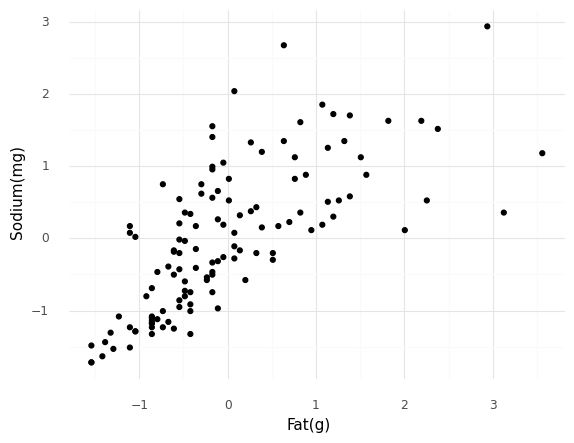

<ggplot: (-9223372036512532613)>

In [159]:
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()
X[["Fat(g)", "Sodium(mg)"]] = z.fit_transform(X)

(ggplot(X, aes("Fat(g)", "Sodium(mg)")) + geom_point() + theme_minimal())

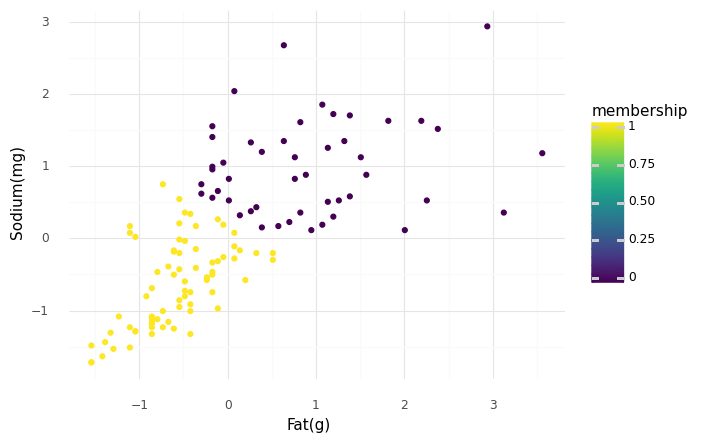

<ggplot: (-9223372036521019399)>

In [160]:
km = KMeans(n_clusters = 2)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

(ggplot(X, aes("Fat(g)", "Sodium(mg)", color = "membership")) + geom_point() + theme_minimal())

## 3. Evaluate Model

In [161]:
silhouette_score(X[features], membership)

0.4888133809282478

# Another Example

In [162]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)",
            "Sugar(g)", "Protein(g)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)

km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

silhouette_score(X[features], membership)

0.27793910693312035

## Choosing K

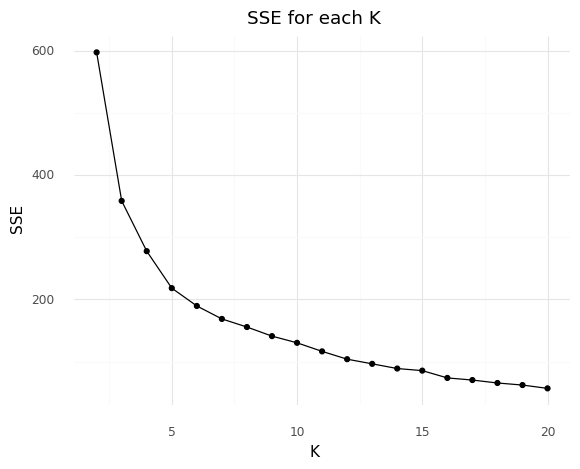

<ggplot: (-9223372036513724791)>

In [163]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sse = []
sils = []
for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))

sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})
(ggplot(sse_df, aes(x = "K", y = "SSE")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "SSE for each K"))

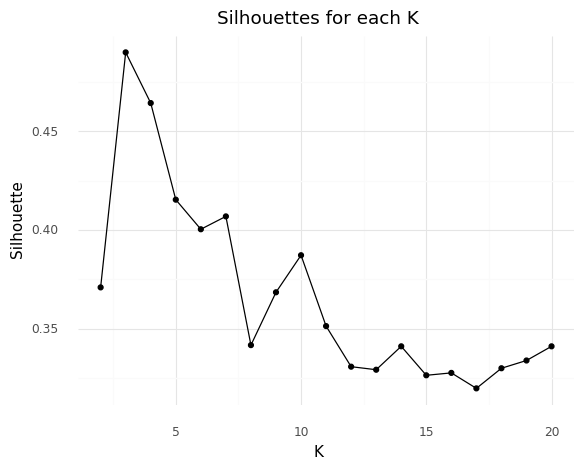

<ggplot: (340578610)>

In [164]:
(ggplot(sse_df, aes(x = "K", y = "Silhouette")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "Silhouettes for each K"))

# Another Another Example
Data from [here](https://www.kaggle.com/josephvm/major-league-soccer-dataset/version/51?select=all_players.csv).

In [165]:
d = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/all_players.csv"
mls = pd.read_csv(d)
mls.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


In [166]:
la = mls.loc[(mls.Club == "LA") & (mls.Year == 2018),]
print(la.shape[0], "rows")
la.head()

25 rows


,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
8338,Zlatan Ibrahimovic,LA,F,27,24,2143,22,10,116,49,...,5,0.42,36,34,27,5,1,42.24,2018,reg
8360,Romain Alessandrini,LA,M,26,23,1920,11,9,63,24,...,5,0.42,35,32,7,7,0,38.10,2018,reg
8405,Sacha Kljestan,LA,M,30,29,2522,6,6,47,17,...,4,0.21,18,30,3,4,0,36.17,2018,reg
8414,Chris Pontius,LA,M,26,15,1485,5,6,26,8,...,1,0.36,21,25,2,3,0,30.77,2018,reg
8463,Giovani dos Santos,LA,M,14,10,823,3,2,25,9,...,1,0.22,9,12,2,2,0,36.00,2018,reg


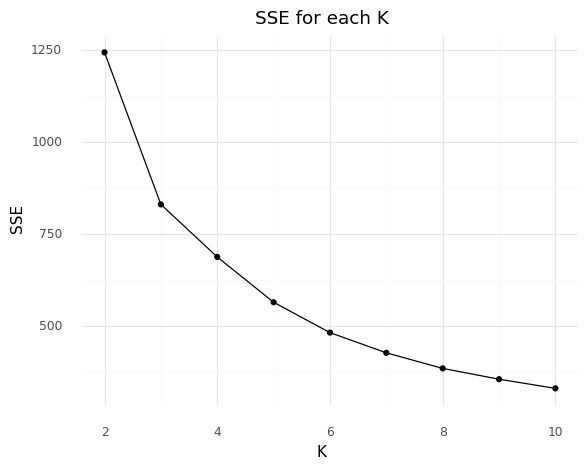

<ggplot: (342250395)>

In [167]:
preds = ["G", "A", "FC"]

ks = [2,3,4,5,6,7,8,9,10]
sse = []
sils = []

mls2018 = mls.loc[mls.Year == 2018,]
X = mls2018[preds]

z = StandardScaler()
X[preds] = z.fit_transform(X[preds])

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))

sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})
(ggplot(sse_df, aes(x = "K", y = "SSE")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "SSE for each K"))


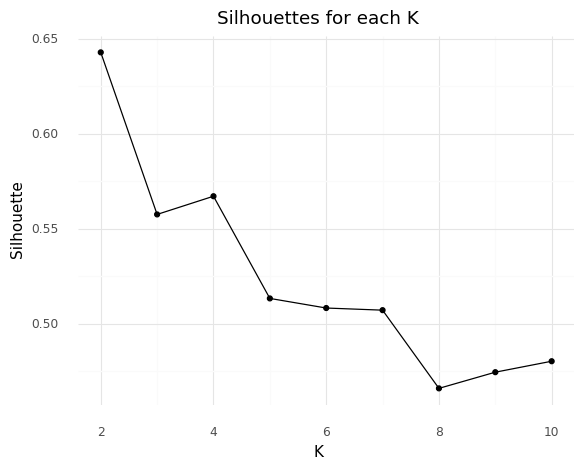

<ggplot: (333856292)>

In [168]:
(ggplot(sse_df, aes(x = "K", y = "Silhouette")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "Silhouettes for each K"))

## Summarize Clusters


In [169]:
km = KMeans(n_clusters = 4)
km.fit(X)
mls2018["assignments"] = km.predict(X)
mls2018.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season,assignments
8337,Josef Martinez,ATL,F,34,34,2898,31,6,97,56,...,0.19,24,31,35,1,0,57.73,2018,reg,3
8338,Zlatan Ibrahimovic,LA,F,27,24,2143,22,10,116,49,...,0.42,36,34,27,5,1,42.24,2018,reg,3
8339,Bradley Wright-Phillips,LAFC,F,32,28,2536,20,8,82,37,...,0.28,32,55,31,7,0,45.12,2018,reg,3
8340,Mauro Manotas,HOU,F,33,30,2633,19,1,95,43,...,0.03,24,20,23,1,0,45.26,2018,reg,3
8341,Gyasi Zardes,CLB,F,33,33,2948,19,0,88,40,...,0.00,27,33,20,3,0,45.45,2018,reg,3


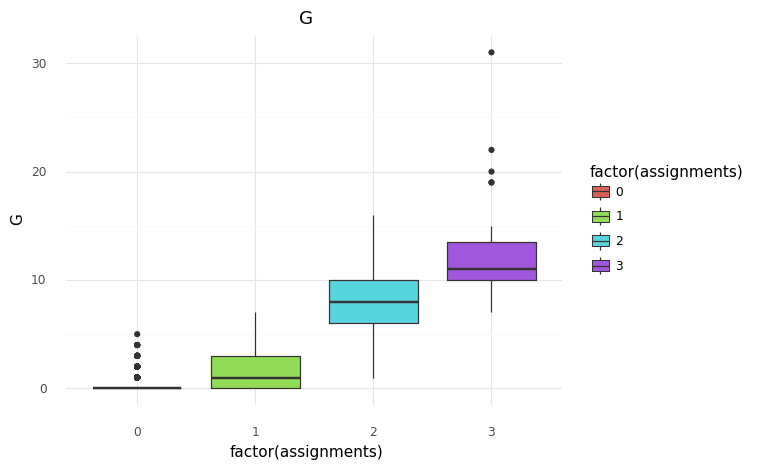

<ggplot: (-9223372036513717027)>


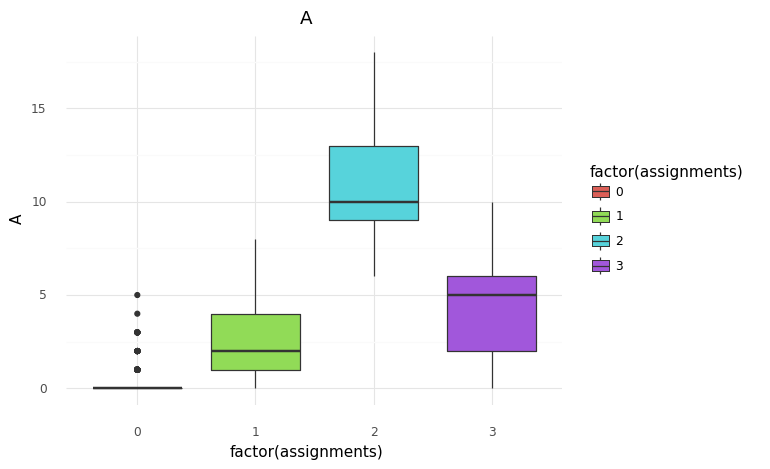

<ggplot: (-9223372036520938906)>


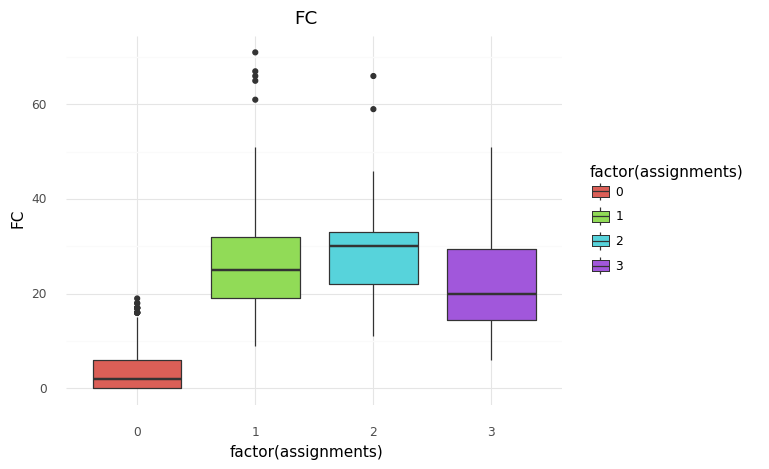

<ggplot: (-9223372036512827276)>


In [170]:
for pred in preds:
    print(ggplot(mls2018,
    aes(x = "factor(assignments)", y = pred, fill = "factor(assignments)" )) +
    geom_boxplot() +
    theme_minimal() + labs(title = pred))

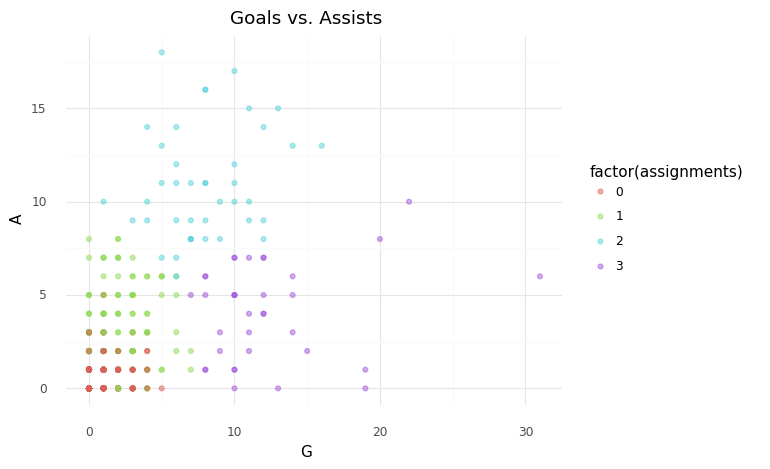

<ggplot: (-9223372036512536965)>

In [171]:
(ggplot(mls2018, aes(x = "G", y = "A", color = "factor(assignments)")) + geom_point(alpha = 0.5) +
theme_minimal() + labs(title = "Goals vs. Assists"))

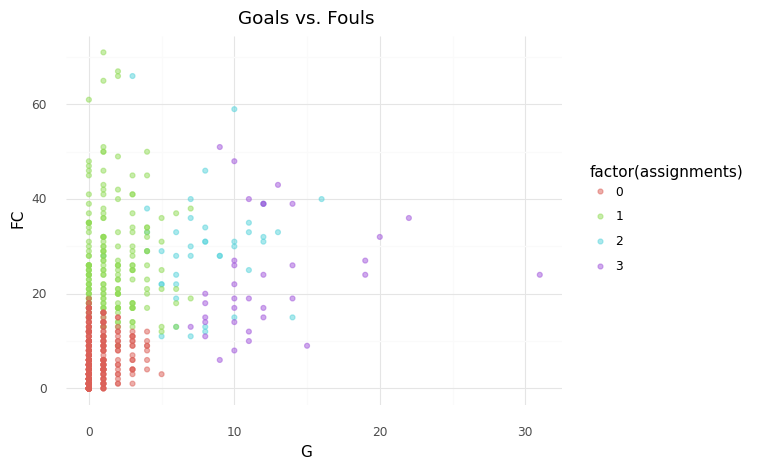

<ggplot: (-9223372036512819077)>

In [172]:
(ggplot(mls2018, aes(x = "G", y = "FC", color = "factor(assignments)")) + geom_point(alpha = 0.5) +
theme_minimal() + labs(title = "Goals vs. Fouls"))

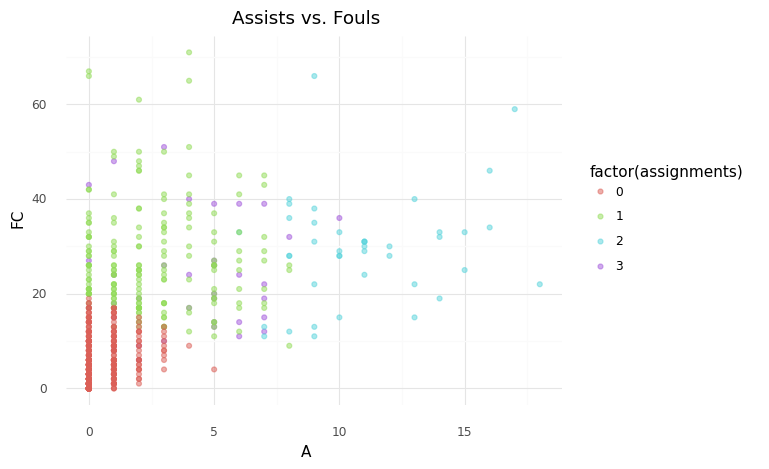

<ggplot: (-9223372036512827276)>

In [173]:
(ggplot(mls2018, aes(x = "A", y = "FC", color = "factor(assignments)")) + geom_point(alpha = 0.5) +
theme_minimal() + labs(title = "Assists vs. Fouls"))

In [174]:
mls2018.groupby("assignments").mean()[["G","A", "FC"]]

,G,A,FC
assignments,,,
0,0.347518,0.317376,4.054965
1,1.629630,2.513228,27.000000
2,7.926829,10.951220,29.341463
3,12.285714,4.114286,23.514286


In [176]:
mls2018.loc[mls2018.assignments == 2,"Player"].sample(10)

8348    Sebastian Giovinco
8377        Diego Fagundez
8368        Johnny Russell
8411        Tomas Martinez
8386            Joao Plata
8410          Borek Dockal
8442        Roger Espinoza
8384    Maximiliano Urruti
8385        Victor Vazquez
8529           Ashley Cole
Name: Player, dtype: object

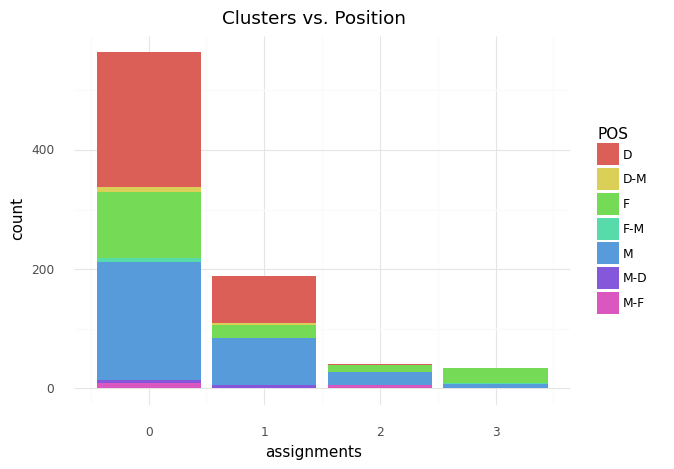

<ggplot: (340514508)>

In [177]:
(ggplot(mls2018, aes(x = "assignments", fill = "POS")) + geom_bar() +
theme_minimal() + labs(title = "Clusters vs. Position"))

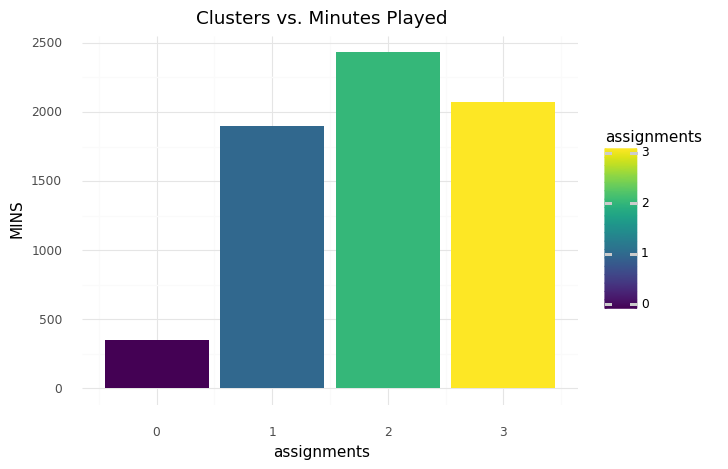

<ggplot: (341768389)>

In [182]:
(ggplot(mls2018, aes(x = "assignments", y = "MINS", fill = "assignments")) +
 stat_summary(fun_data = "mean_sdl", geom = "bar") +
theme_minimal() + labs(title = "Clusters vs. Minutes Played"))